In [1]:
from tensorflow.keras.models import Sequential # atualizado: tensorflow==2.0.0-beta1
from tensorflow.keras.layers import Dense, Dropout, LSTM # atualizado: tensorflow==2.0.0-beta1
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
base = pd.read_csv('petr4_treinamento.csv')
base = base.dropna()
base_treinamento = base.iloc[:, 1:2].values 

In [3]:
normalizador = MinMaxScaler(feature_range=(0,1))
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)

In [4]:
previsores = []
preco_real = []

for i in range(90, 1242):
    previsores.append(base_treinamento_normalizada[i-90:i, 0])
    preco_real.append(base_treinamento_normalizada[i, 0])
    
previsores, preco_real = np.array(previsores), np.array(preco_real)

previsores = np.reshape(previsores, (previsores.shape[0], previsores.shape[1], 1))

In [5]:
regressor = Sequential()

regressor.add(LSTM(units=50, return_sequences=True, input_shape=(previsores.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

regressor.compile(optimizer='adam', loss='mean_squared_error')

In [7]:
regressor.fit(previsores, preco_real, epochs=100, batch_size=32)

Epoch 1/100
36/36 [==============================] - 6s 49ms/step - loss: 4.9489e-04
Epoch 2/100
36/36 [==============================] - 2s 47ms/step - loss: 4.5593e-05
Epoch 3/100
36/36 [==============================] - 2s 47ms/step - loss: 3.4120e-05
Epoch 4/100
36/36 [==============================] - 2s 47ms/step - loss: 3.7145e-05
Epoch 5/100
36/36 [==============================] - 2s 47ms/step - loss: 2.9434e-05
Epoch 6/100
36/36 [==============================] - 2s 47ms/step - loss: 2.8181e-05
Epoch 7/100
36/36 [==============================] - 2s 47ms/step - loss: 2.6822e-05
Epoch 8/100
36/36 [==============================] - 2s 47ms/step - loss: 3.0731e-05
Epoch 9/100
36/36 [==============================] - 2s 47ms/step - loss: 2.8387e-05
Epoch 10/100
36/36 [==============================] - 2s 47ms/step - loss: 2.8270e-05
Epoch 11/100
36/36 [==============================] - 2s 47ms/step - loss: 2.6122e-05
Epoch 12/100
36/36 [==============================] - 2s 48ms/s

36/36 [==============================] - 2s 49ms/step - loss: 1.3177e-05
Epoch 97/100
36/36 [==============================] - 2s 48ms/step - loss: 1.3632e-05
Epoch 98/100
36/36 [==============================] - 2s 49ms/step - loss: 1.3425e-05
Epoch 99/100
36/36 [==============================] - 2s 49ms/step - loss: 1.3672e-05
Epoch 100/100
36/36 [==============================] - 2s 49ms/step - loss: 1.2858e-05


In [8]:
base_teste = pd.read_csv('petr4_teste.csv')
preco_real_teste = base_teste.iloc[:, 1:2].values
base_completa = pd.concat((base['Open'], base_teste['Open']), axis = 0)
entradas = base_completa[len(base_completa) - len(base_teste) - 90:].values
entradas = entradas.reshape(-1, 1)
entradas = normalizador.transform(entradas)
X_teste = []
for i in range(90, 112):
    X_teste.append(entradas[i-90:i, 0])
    
X_teste = np.array(X_teste)
X_teste = np.reshape(X_teste, (X_teste.shape[0], X_teste.shape[1], 1))

previsoes = regressor.predict(X_teste)
previsoes = normalizador.inverse_transform(previsoes)

previsoes.mean()

412.14743

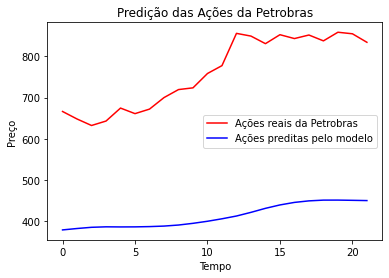

In [10]:
plt.plot(preco_real_teste, color='red', label='Ações reais da Petrobras')
plt.plot(previsoes, color='blue', label='Ações preditas pelo modelo')
plt.title("Predição das Ações da Petrobras")
plt.xlabel("Tempo")
plt.ylabel("Preço")
plt.legend()

plt.show()

In [11]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(preco_real_teste, previsoes))

rmse

354.3545275521434